## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [377]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [378]:
# Random state seed
rseed = 42

## Load and explore data

In [379]:
# Import the dataset
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [380]:
# Check the shape
data.shape

(167, 10)

In [381]:
# Check datatypes & counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [382]:
# Get descriptive statistics
descriptive_stats = data.describe()
descriptive_stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [383]:
# Identify any missing data
missing_values = data.isnull().sum()
missing_values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [384]:
# Drop any non-numeric features (columns)
# (If I would import as the data with the column index = 0 parameter 
# Would I need to do anything with this step?) 
data_dropped = data.drop(columns ='country')
data_dropped

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


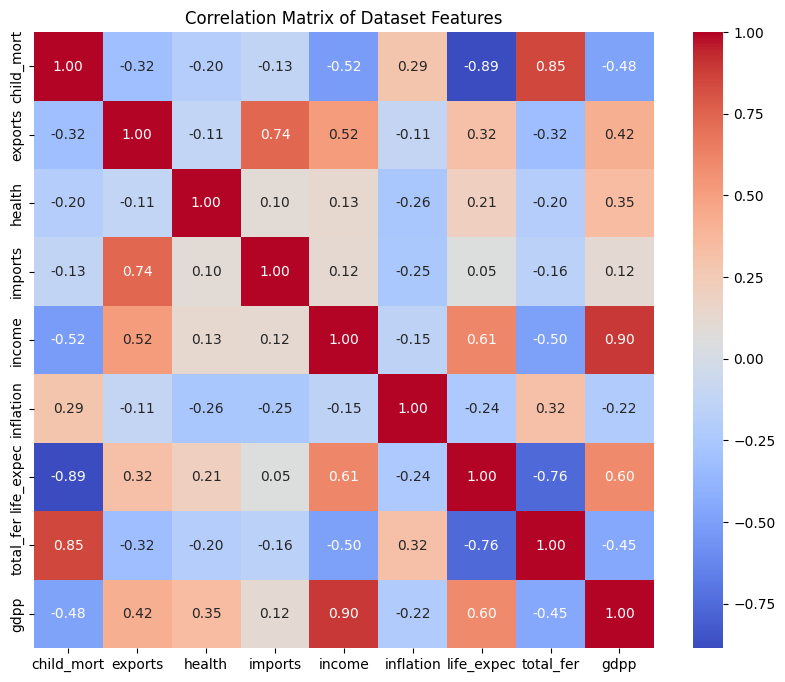

In [385]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
# Compute correlation matrix for the dataset
correlation_matrix = data_dropped.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset Features')
plt.show()

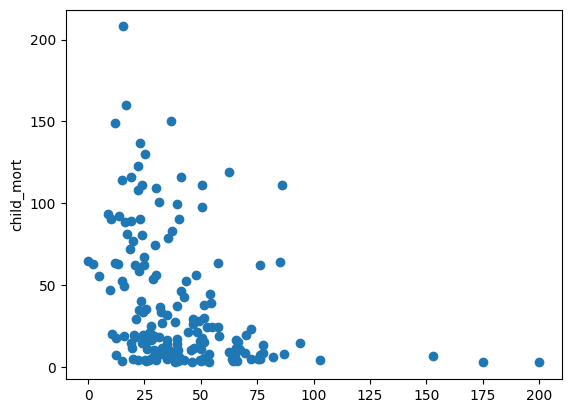

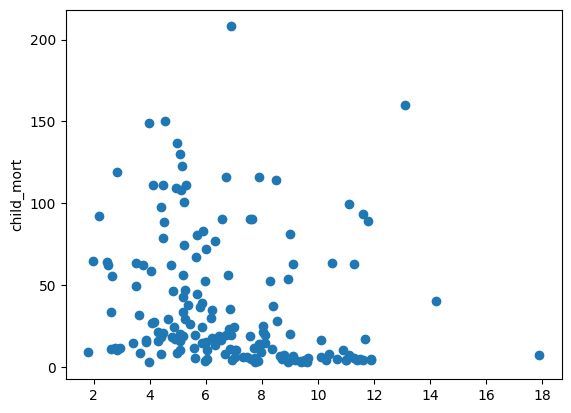

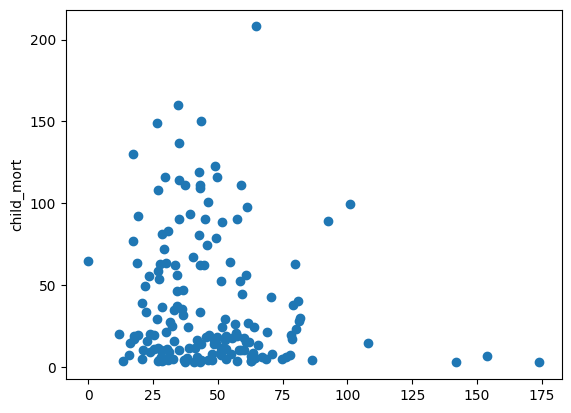

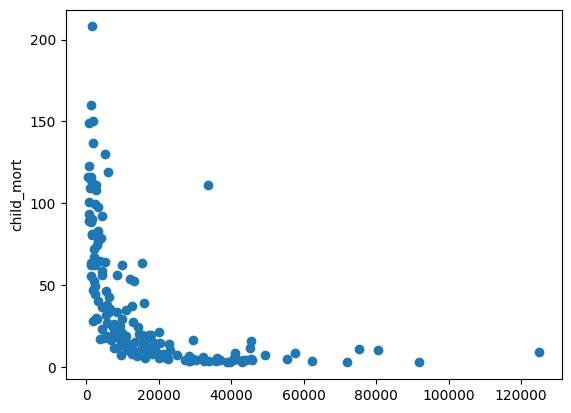

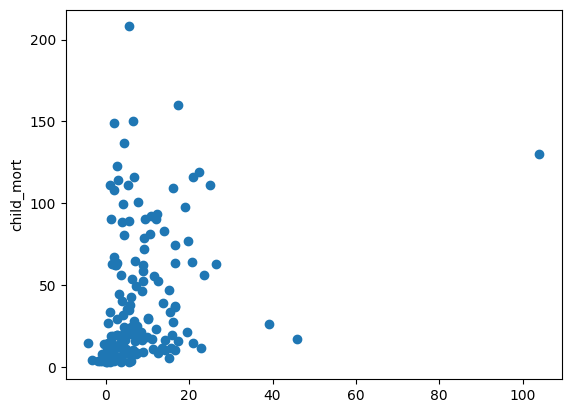

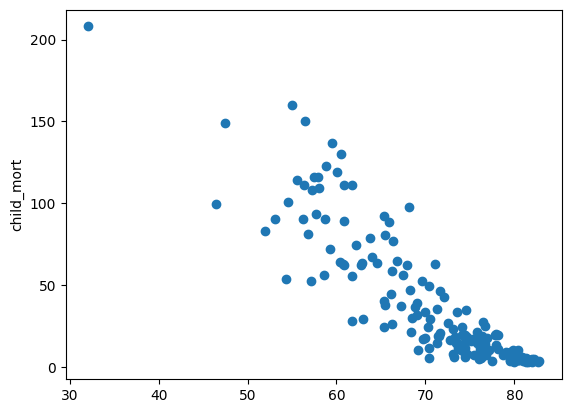

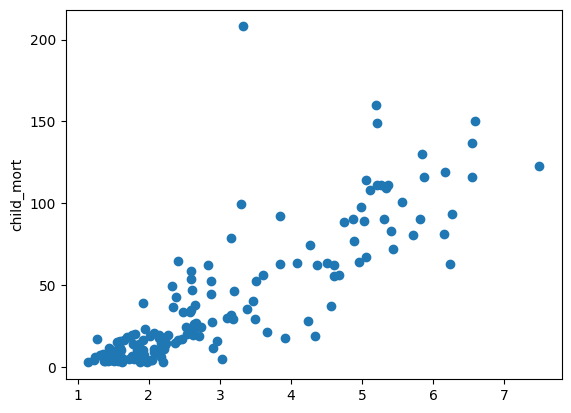

In [386]:
# Explore the continuous independent features against child_mort using scatter plots.

for f in data_dropped.columns[1:-1]:
  plt.scatter(data_dropped[f], data_dropped['child_mort'])
  plt.ylabel('child_mort')
  plt.show()

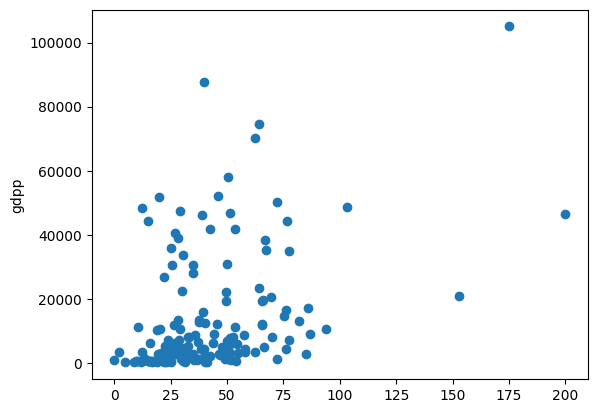

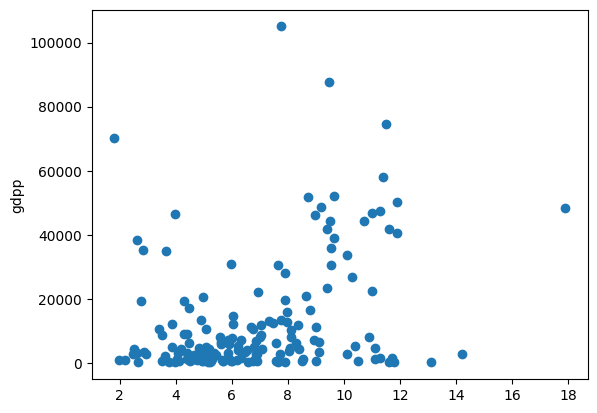

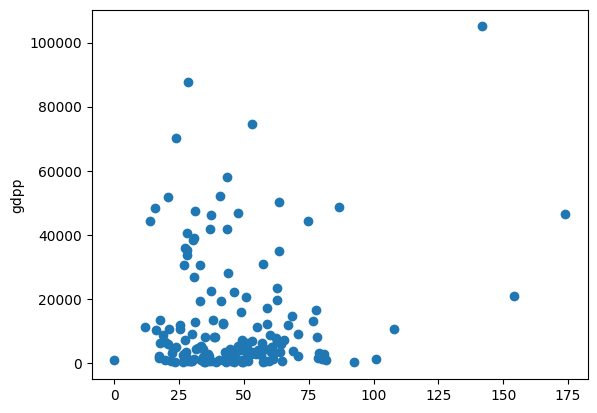

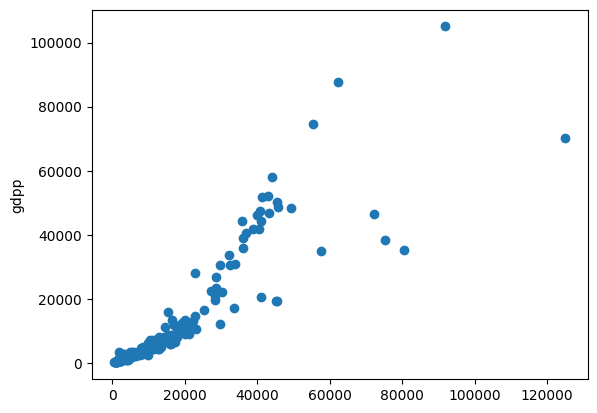

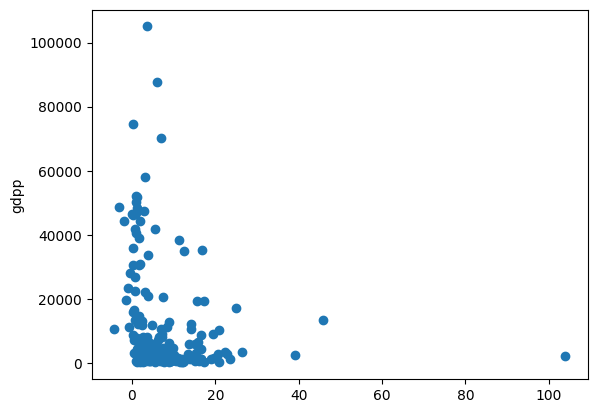

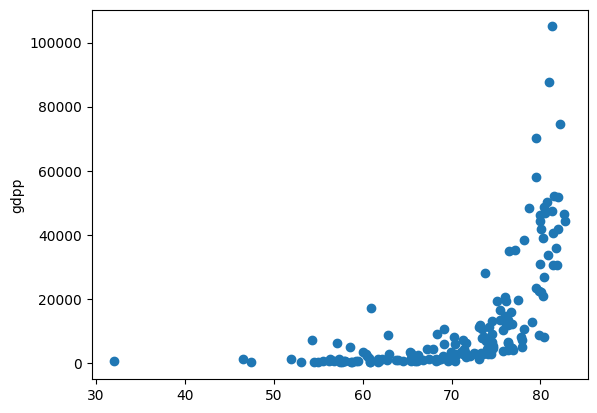

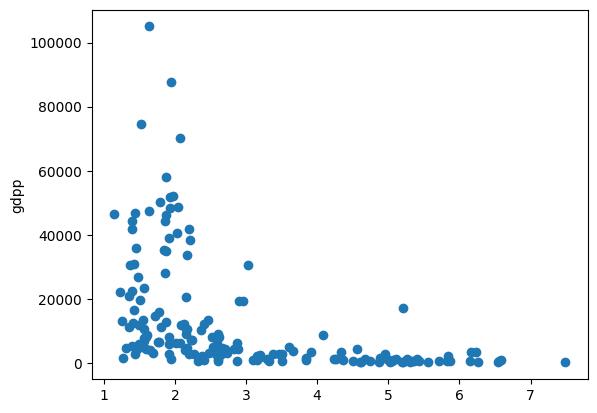

In [387]:
# Explore the continuous independent features against gdpp using scatter plots.

for f in data_dropped.columns[1:-1]:
  plt.scatter(data_dropped[f], data_dropped['gdpp'])
  plt.ylabel('gdpp')
  plt.show()

In [388]:
# Create a pair plot
# Hint: Explore seaborn pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(data_dropped)
plt.title('Pair Plot of Features')
plt.show()

<Figure size 1200x1000 with 0 Axes>

KeyboardInterrupt: 

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [ ]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler = MinMaxScaler()

#Fit the scaler
scaler.fit(data_dropped)

# Transform the data and convert it back to a DataFrame
df_scaled = pd.DataFrame(scaler.transform(data_dropped), columns=data_dropped.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

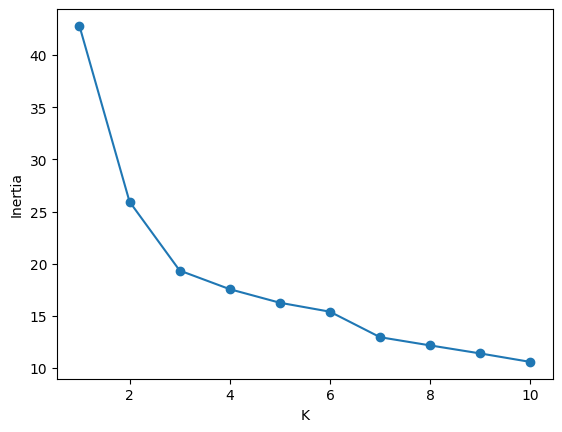

In [ ]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

elbow_Kmeans(df_scaled, max_k=10, r=42)


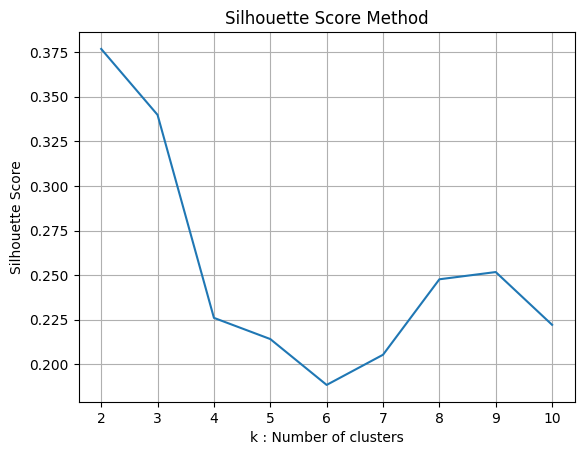

In [ ]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [ ]:
# Remember to set the random_state to rseed
k = 3
kmeans = KMeans(n_clusters=k, random_state=rseed)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [ ]:
# Count the number of records in each cluster
cluster_counts = pd.Series(labels).value_counts()
cluster_counts

0    87
2    45
1    35
Name: count, dtype: int64

In [ ]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.340


## Predictions

In [ ]:
# Add the predicted cluster label column to the original dataframe
data_clusters = data.copy()
data_clusters['Cluster'] = labels


data_clusters.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [ ]:
cluster_means = data_clusters.drop(columns=['country']).groupby('Cluster').mean()
cluster_means


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.490805,40.484931,6.242414,47.326045,12644.482759,7.599839,72.457471,2.315632,6657.379310
1,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857
2,94.733333,28.842444,6.289333,42.455556,3555.400000,12.214556,59.342222,5.109111,1704.933333


In [ ]:
# Create a mapping dictionary
label_mapping = {0: 'Developing', 1: 'Developed', 2: 'Least Developed'}

# Assign the specified labels to the clusters
data_clusters['Cluster Label'] = data_clusters['Cluster'].map(label_mapping)

data_clusters

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster Label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,Least Developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,Least Developed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,Least Developed


## Visualisation of clusters

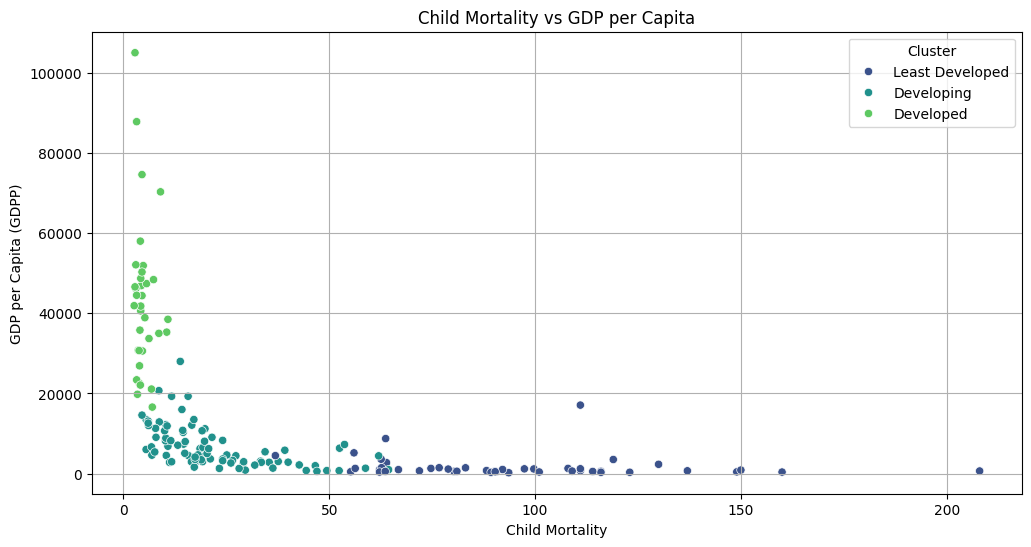

In [ ]:
# Visualisation of clusters: child mortality vs gdpp

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_clusters['child_mort'], y=data_clusters['gdpp'], hue=data_clusters['Cluster Label'], palette='viridis')
plt.title('Child Mortality vs GDP per Capita')
plt.ylabel('GDP per Capita (GDPP)')
plt.xlabel('Child Mortality')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

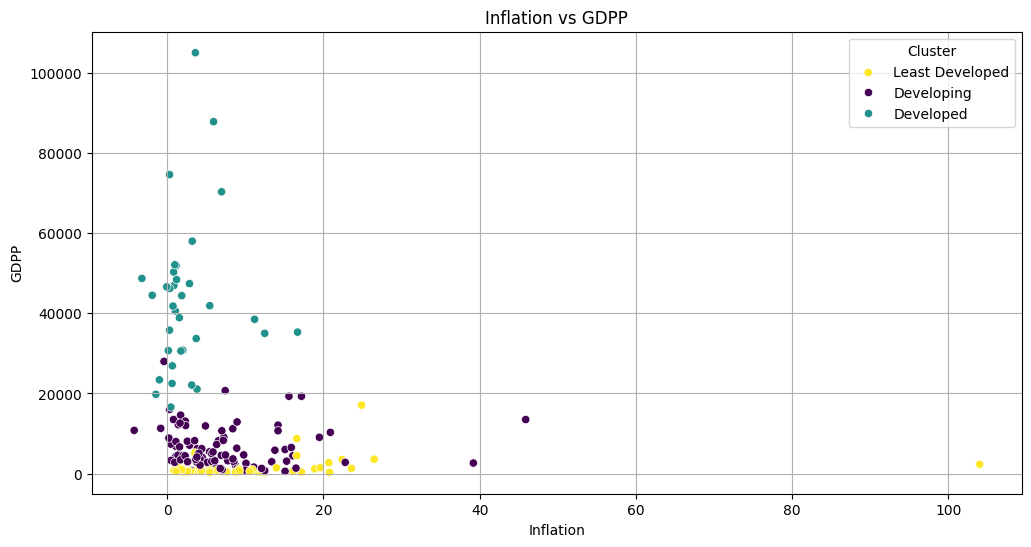

In [ ]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_clusters['inflation'], y=data_clusters['gdpp'], hue=data_clusters['Cluster labels'], palette='viridis')
plt.title('Inflation vs GDPP')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

As you can see on the mean of CLusters there is high correlation between mortality, income,inflation and GDPP
i.e
Countries with highest child mortality and lowest GDPP correlation is likely "Least Developed".

Countries with highest child mortality and lowest GDPP correlation is likely "Least Developed"

Countries with moderate values across all features are likely "Developing".

Countries with lowest child mortality and highest GDPP are likely "Developed".
